In [2]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

from lib import *

%matplotlib inline

In [3]:
os.listdir()

['data', 'lib', 'notebooks', 'README.md', 'results']

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

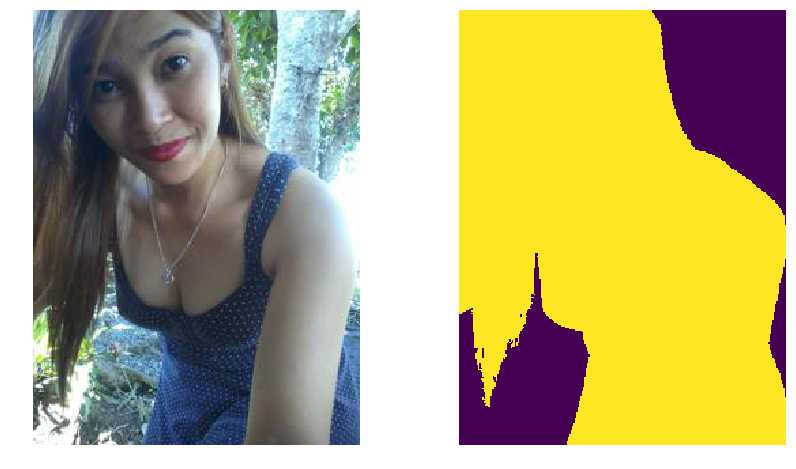

In [4]:
path = "../data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)

Пример подсчета метрики:

In [5]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.6050179948586112

Можно для последовательности масок вычислить среднее значение метрики:

In [6]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.4999004335682334

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [7]:
rle_mask = encode_rle(mask)
rle_mask

'1 142 241 142 481 143 721 143 961 144 1201 144 1441 145 1681 146 1921 147 2161 147 2401 148 2641 148 2881 148 3121 148 3361 148 3601 149 3841 148 4081 148 4321 148 4561 149 4801 149 5041 149 5281 149 5521 149 5761 149 6001 149 6241 150 6481 150 6721 149 6961 150 7201 150 7441 150 7681 150 7921 150 8161 150 8401 150 8641 150 8881 151 9121 151 9361 151 9601 151 9841 151 10081 151 10321 151 10561 152 10801 152 11041 152 11281 152 11521 153 11761 153 12001 153 12241 153 12481 153 12721 153 12961 154 13201 154 13441 154 13681 154 13921 155 14161 155 14401 155 14641 156 14881 156 15121 156 15361 156 15601 156 15841 156 16081 157 16321 157 16561 157 16801 158 17041 158 17281 158 17521 159 17761 159 18001 159 18241 159 18481 160 18721 160 18961 161 19201 161 19441 162 19681 162 19921 163 20161 162 20401 163 20641 164 20881 164 21121 164 21361 165 21601 165 21841 167 22081 167 22321 167 22561 167 22801 169 23041 170 23281 170 23521 170 23761 171 24001 172 24241 173 24481 173 24721 176 24961 18

Теперь восстановим маску:

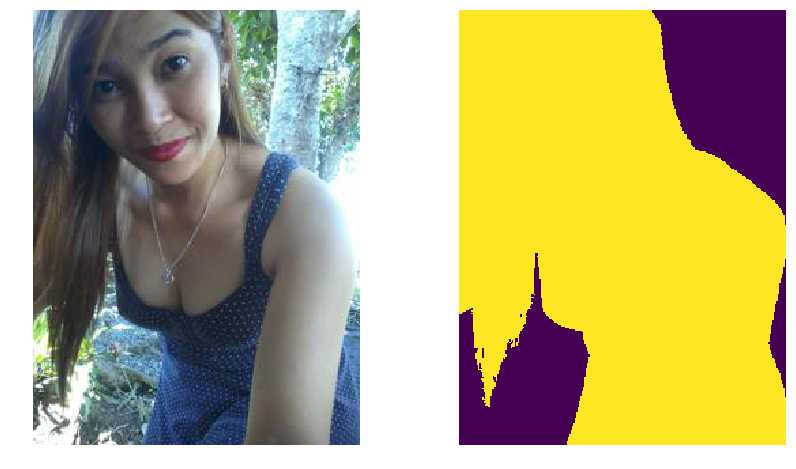

In [8]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [9]:
pred = pd.read_csv("../data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [42]:
paths_to_imgs = sorted(glob("data/valid/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

FileNotFoundError: [Errno 2] No such file or directory: 'results/example/valid\\1315_img.jpg'

In [17]:
# img_id = path_to_img.split("/")[-1].split(".")[0]

In [44]:
357 /60

5.95

In [20]:
np.array(paths_to_imgs)[0]

'data/valid\\1315.jpg'

In [24]:
np.array(pred_masks)[0]

(320, 240)

In [37]:
orser = np.argsort(np.array(paths_to_imgs))

In [40]:
np.array(paths_to_imgs)[orser]

array(['data/valid\\1315.jpg', 'data/valid\\1316.jpg',
       'data/valid\\1317.jpg', 'data/valid\\1318.jpg',
       'data/valid\\1319.jpg', 'data/valid\\1320.jpg',
       'data/valid\\1321.jpg', 'data/valid\\1322.jpg',
       'data/valid\\1323.jpg', 'data/valid\\1324.jpg',
       'data/valid\\1325.jpg', 'data/valid\\1326.jpg',
       'data/valid\\1327.jpg', 'data/valid\\1328.jpg',
       'data/valid\\1329.jpg', 'data/valid\\1330.jpg',
       'data/valid\\1331.jpg', 'data/valid\\1332.jpg',
       'data/valid\\1333.jpg', 'data/valid\\1334.jpg',
       'data/valid\\1335.jpg', 'data/valid\\1336.jpg',
       'data/valid\\1337.jpg', 'data/valid\\1338.jpg',
       'data/valid\\1339.jpg', 'data/valid\\1340.jpg',
       'data/valid\\1341.jpg', 'data/valid\\1342.jpg',
       'data/valid\\1343.jpg', 'data/valid\\1344.jpg',
       'data/valid\\1345.jpg', 'data/valid\\1346.jpg',
       'data/valid\\1347.jpg', 'data/valid\\1348.jpg',
       'data/valid\\1349.jpg', 'data/valid\\1350.jpg',
       'da

In [34]:
paths_to_imgs[0:144]

AttributeError: 'list' object has no attribute 'shape'

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.

In [14]:
os.listdir()

['data', 'lib', 'notebooks', 'README.md', 'results']

In [13]:
sorted(glob("data/valid/*"))

[]

In [25]:
np.arange(10).astype(bool).sum()

9

In [84]:
A = np.array([0,0,0,0,0,0,0,0,0,0]).sum()
A

0

In [85]:
B = np.array([1,1,1,1,1,1,1,1,1,1]).sum()
B

10

In [86]:
A & B

0

In [87]:
import numpy as np

k=1

# segmentation
seg = np.zeros((100,100), dtype='int')
seg[30:70, 30:70] = k

# ground truth
gt = np.zeros((100,100), dtype='int')
gt[30:70, 40:80] = k

dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))

print ('Dice similarity score is {}'.format(dice))

Dice similarity score is 0.75


In [88]:
seg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
np.sum(seg[gt==k]) 

1200

In [90]:
np.sum(seg)

1600

In [91]:
np.sum(gt)

1600

In [92]:
2400 / 3200

0.75

In [93]:
0 & 0

0

In [94]:
from scipy.spatial.distance import dice

In [95]:
dice(A,B)

1.0